<a href="https://colab.research.google.com/github/Andyqballer/HomeWork3/blob/main/HomeWork3ProblemOne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Classification with Logistic Regression
Data Analysis and Model Training
This notebook demonstrates how to build and evaluate a logistic regression model for diabetes classification using scikit-learn.

First, let's import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss

# Set a random seed for reproducibility
np.random.seed(42)

Data Loading and Preprocessing
Let's load the diabetes dataset and prepare it for training:

In [ ]:
data = pd.read_csv('diabetes.csv')

# Displaying the first few rows and basic information about the dataset
print("Dataset Shape:", data.shape)
print("\nFirst few rows of the dataset:")
display(data.head())

# Separate features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nTraining set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

Dataset Shape: (768, 9)

First few rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Training set shape: (614, 8)
Test set shape: (154, 8)


Model Training and Basic Evaluation
Now let's train the model and evaluate its performance

In [ ]:
# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model Performance Metrics:
Accuracy: 0.7532
Precision: 0.6491
Recall: 0.6727
F1 Score: 0.6607


Confusion Matrix Visualization
Let's visualize the confusion matrix

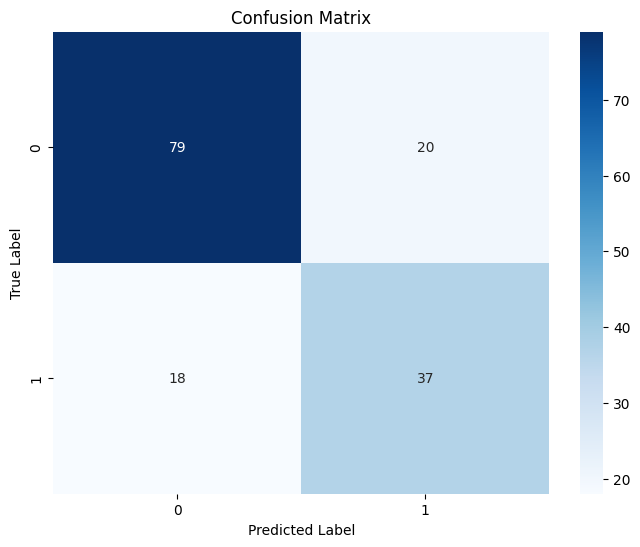

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Training Analysis Over Iterations
Now let's analyze how the model performs over different numbers of iterations

In [ ]:
def calculate_metrics_over_iterations(X_train, y_train, X_test, y_test, max_iter_range):
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    for iter_num in max_iter_range:
        model = LogisticRegression(max_iter=iter_num)
        model.fit(X_train, y_train)

        # Calculate training metrics
        y_train_pred = model.predict(X_train)
        y_train_prob = model.predict_proba(X_train)
        train_loss = log_loss(y_train, y_train_prob)
        train_accuracy = accuracy_score(y_train, y_train_pred)

        # Calculate test metrics
        y_test_pred = model.predict(X_test)
        y_test_prob = model.predict_proba(X_test)
        test_loss = log_loss(y_test, y_test_prob)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    return train_losses, test_losses, train_accuracies, test_accuracies

# Calculate metrics over iterations
iter_range = range(10, 1010, 50)
train_losses, test_losses, train_accuracies, test_accuracies = calculate_metrics_over_iterations(
    X_train_scaled, y_train, X_test_scaled, y_test, iter_range
)

# Print accuracy values
print("Iteration Results:")
print("\nIter\tTrain Acc\tTest Acc\tTrain Loss\tTest Loss")
print("-" * 50)
for i, iter_num in enumerate(iter_range):
    print(f"{iter_num}\t{train_accuracies[i]:.4f}\t{test_accuracies[i]:.4f}\t{train_losses[i]:.4f}\t{test_losses[i]:.4f}")

Iteration Results:

Iter	Train Acc	Test Acc	Train Loss	Test Loss
--------------------------------------------------
10	0.7704	0.7532	0.4679	0.5094
60	0.7704	0.7532	0.4679	0.5094
110	0.7704	0.7532	0.4679	0.5094
160	0.7704	0.7532	0.4679	0.5094
210	0.7704	0.7532	0.4679	0.5094
260	0.7704	0.7532	0.4679	0.5094
310	0.7704	0.7532	0.4679	0.5094
360	0.7704	0.7532	0.4679	0.5094
410	0.7704	0.7532	0.4679	0.5094
460	0.7704	0.7532	0.4679	0.5094
510	0.7704	0.7532	0.4679	0.5094
560	0.7704	0.7532	0.4679	0.5094
610	0.7704	0.7532	0.4679	0.5094
660	0.7704	0.7532	0.4679	0.5094
710	0.7704	0.7532	0.4679	0.5094
760	0.7704	0.7532	0.4679	0.5094
810	0.7704	0.7532	0.4679	0.5094
860	0.7704	0.7532	0.4679	0.5094
910	0.7704	0.7532	0.4679	0.5094
960	0.7704	0.7532	0.4679	0.5094


Visualization of Training Results
Finally, let's visualize how the model's performance changes over iterations

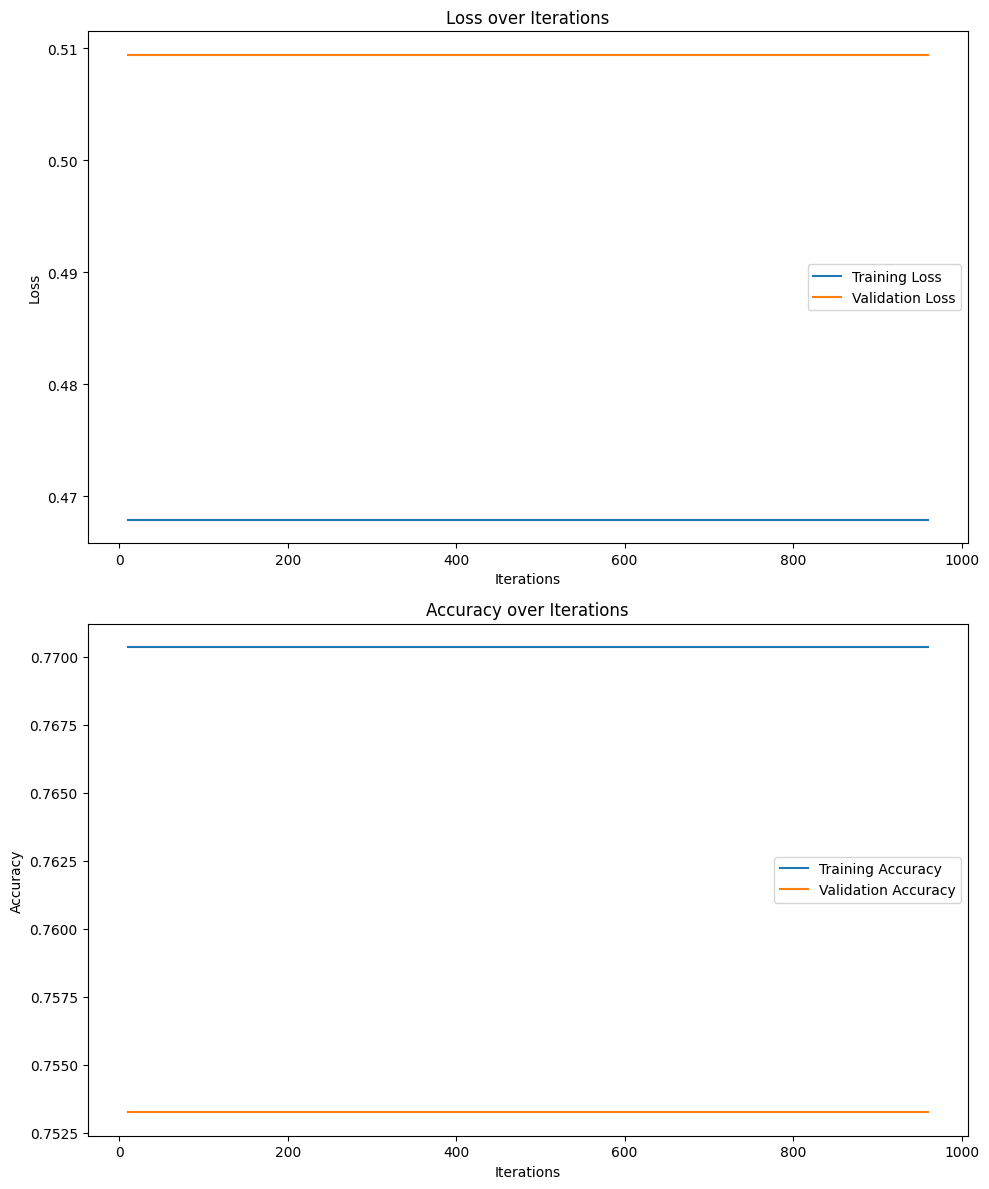

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot loss over iterations
ax1.plot(list(iter_range), train_losses, label='Training Loss')
ax1.plot(list(iter_range), test_losses, label='Validation Loss')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Loss')
ax1.set_title('Loss over Iterations')
ax1.legend()

# Plot accuracy over iterations
ax2.plot(list(iter_range), train_accuracies, label='Training Accuracy')
ax2.plot(list(iter_range), test_accuracies, label='Validation Accuracy')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy over Iterations')
ax2.legend()

plt.tight_layout()
plt.show()